In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Util import gen_xor, gen_nine_grid, gen_two_clusters, gen_five_clusters, visualize2d

class NaiveNN:
    def __init__(self, ws=None):
        self._ws = ws
        
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    def fit(self, x, y, hidden_dim=4, lr=0.001, epoch=1000):
        input_dim, output_dim = x.shape[1], y.shape[1]
        if self._ws is None:
            self._ws = [
                np.random.random([input_dim, hidden_dim]),
                np.random.random([hidden_dim, output_dim])
            ]
        losses = []
        for _ in range(epoch):
            u1 = x.dot(self._ws[0]); v1 = NaiveNN.relu(u1)
            u2 = v1.dot(self._ws[1]); v2 = u2
            losses.append(np.linalg.norm(y - v2))
            d1 = -2 * (y - v2); dw2 = v1.T.dot(d1)
            d2 = d1.dot(self._ws[1].T) * (v1 > 0); dw1 = x.T.dot(d2)
            self._ws[0] -= lr * dw1; self._ws[1] -= lr * dw2
        return losses
    
    def predict(self, x):
        u1 = x.dot(self._ws[0]); v1 = NaiveNN.relu(u1)
        return np.argmax(v1.dot(self._ws[1]), axis=1)

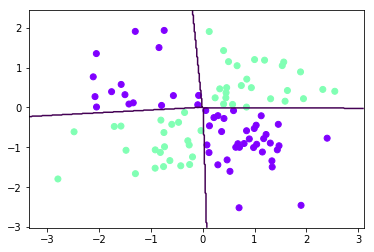

准确率：   100.0 %


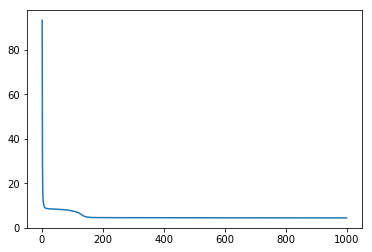

In [2]:
x, y = gen_xor()
label = np.argmax(y, axis=1)
nn = NaiveNN()
losses = nn.fit(x, y, 24)
visualize2d(nn, x, label)
print("准确率：{:8.6} %".format((nn.predict(x) == label).mean() * 100))

plt.figure()
plt.plot(np.arange(1, len(losses)+1), losses)
plt.show()